In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import tmdbsimple as tmdb
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt
import os

In [2]:
import json
with open('/Users/paulm/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)
## Display the keys of the loaded dict
login.keys()

dict_keys(['api-key'])

In [3]:
tmdb.API_KEY =  login['api-key']

In [4]:
# Checking the Data folder
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_2018.csv.gz',
 'final_tmdb_data_2019.csv.gz',
 'final_tmdb_data_2020.csv.gz',
 'final_tmdb_data_2021.csv.gz',
 'final_tmdb_data_2022.csv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_imdb.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2018.json',
 'tmdb_api_results_2019.json',
 'tmdb_api_results_2020.json',
 'tmdb_api_results_2021.json',
 'tmdb_api_results_2022.json',
 'tmdb_results_combined.csv.gz']

In [5]:
# Load in the dataframe from project part 1 as basics:
basics = pd.read_csv("data/title_basics.csv.gz",low_memory = False)

In [6]:
# pulling in additional years
tm_22 = pd.read_csv('data/final_tmdb_data_2022.csv.gz', engine='python')

tm_21 = pd.read_csv('data/final_tmdb_data_2021.csv.gz', engine='python')

tm_20 = pd.read_csv('data/final_tmdb_data_2020.csv.gz', engine='python')

tm_19 = pd.read_csv('data/final_tmdb_data_2019.csv.gz', engine='python')

tm_18 = pd.read_csv('data/final_tmdb_data_2018.csv.gz', engine='python')

In [7]:
# Combining years into new DF
frames = [tm_22, tm_21, tm_20, tm_19, tm_18]

df = pd.concat(frames)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0119830,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,307046.0,en,One Dog Day,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,One Dog Day,0.0,0.0,0.0,NaN
2,tt0120589,0.0,/1ZilEjqou6JC369GOKwHWeqCbYL.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,649985.0,pt,Predestinado: Arigó e o Espírito do Dr. Fritz,...,0.0,0.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,NaN,Predestinado: Arigó e o Espírito do Dr. Fritz,0.0,7.5,10.0,NaN
3,tt0200940,0.0,/qSHvhAEnomjwDNmYVnQIBbQyqpA.jpg,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,68240.0,en,Over-sexed Rugsuckers from Mars,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll never trust your vacuum cleaner again!,Over-sexed Rugsuckers from Mars,0.0,3.3,4.0,NaN
4,tt0326716,0.0,/oLyQu5QAR1w7e8roeveNiZXS5kN.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://5-25-77themovie.com,199734.0,en,5-25-77,...,0.0,132.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The true story of a boy... a girl... and the m...,5-25-77,0.0,6.3,7.0,PG-13


In [8]:
# Selecting columns
df1 = df[['imdb_id', 'revenue', 'budget', 'certification']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21190 entries, 0 to 4671
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        21190 non-null  object 
 1   revenue        21185 non-null  float64
 2   budget         21185 non-null  float64
 3   certification  4021 non-null   object 
dtypes: float64(2), object(2)
memory usage: 827.7+ KB


In [9]:
df1['certification'].value_counts()

R        1496
NR       1204
PG-13     752
PG        392
G         133
NC-17      44
Name: certification, dtype: int64

In [10]:
# Dropping rows that are null for columns
df1=df1.dropna(subset=['certification'])
df1=df1.dropna(subset=['revenue'])

In [11]:
# Filter out NR
fil = df1['certification'] != 'NR'
df1 = df1[fil]

In [12]:
# Filter out NR
fil1 = df1['certification'] != 'NC-17'
df1 = df1[fil1]

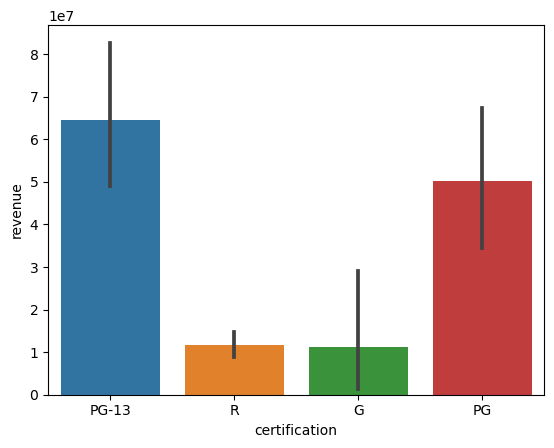

In [13]:
ax = sns.barplot(data=df1, x='certification', y='revenue');

# Q1. Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?


## 1. State the Hypothesis & Null Hypothesis

**Null Hypothesis:** Ratings earn the same amount of revenue

**Alternate Hypothesis:** Ratings earn different amount of revenue

# 2. Determine the correct test to perform.
Numerical Data

multiple groups

Anova Test



In [14]:
## Create groups dictionary
groups = {}
## Loop through all unique categories
for i in df1['certification'].unique():
    ## Get series for group and rename
    data = df1.loc[df1['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG-13', 'R', 'G', 'PG'])

In [15]:
# Running normality test confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    # save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
# convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG-13,752.0,6.213524e-202,926.590921
R,1496.0,0.000000e+00,2355.905836
G,133.0,3.434632e-62,283.052732
PG,392.0,2.652767e-106,486.196833


In [16]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG-13,752.0,6.213524e-202,926.590921,True
R,1496.0,0.000000e+00,2355.905836,True
G,133.0,3.434632e-62,283.052732,True
PG,392.0,2.652767e-106,486.196833,True


In [17]:
stats.levene(*groups.values())

LeveneResult(statistic=25.06655424100071, pvalue=5.350667243110214e-16)

- Since we failed both assumptions for normality and equal variance but our groups are large enough we will use the Kruskal-Wallis test

In [18]:
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=56.78608016745987, pvalue=2.854800696755733e-12)

Since the p-val is less than the alpha I am moving on to the tukey test

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df1['revenue']
labels = df1['certification']

In [20]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,38897243.0651,0.0404,1158235.1313,76636250.999,True
G,PG-13,53345519.2973,0.0006,17968879.7732,88722158.8215,True
G,R,305456.2815,1.0,-33723498.26,34334410.8229,False
PG,PG-13,14448276.2322,0.3872,-8980021.8047,37876574.2691,False
PG,R,-38591786.7836,0.0,-59930677.8529,-17252895.7144,True
PG-13,R,-53040063.0159,0.0,-69851433.4614,-36228692.5703,True


### Final Conclusion
We reject the null hypothesis in support of the alternate hypothesis because there is a statistical difference between ratings and revenue based on certain groups

# Q2. Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much budget a film receives?


## 1. State the Hypothesis & Null Hypothesis

**Null Hypothesis:** Ratings do not affect the budget of a film

**Alternate Hypothesis:** Ratings do affect the budget of a film

# 2. Determine the correct test to perform.
Numerical Data

multiple groups

Anova Test

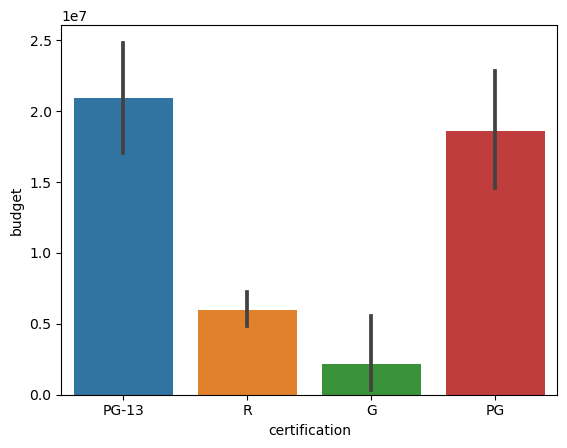

In [21]:
ax = sns.barplot(data=df1, x='certification', y='budget');

In [22]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in df1['certification'].unique():
    ## Get series for group and rename
    data = df1.loc[df1['certification']==i,'budget'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['PG-13', 'R', 'G', 'PG'])

In [23]:
# Running normality test confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    # save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
# convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
PG-13,752.0,1.340117e-124,570.455589
R,1496.0,0.000000e+00,2773.311484
G,133.0,6.162744e-60,272.673167
PG,392.0,7.583785e-55,249.232335


In [24]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
PG-13,752.0,1.340117e-124,570.455589,True
R,1496.0,0.000000e+00,2773.311484,True
G,133.0,6.162744e-60,272.673167,True
PG,392.0,7.583785e-55,249.232335,True


In [25]:
stats.levene(*groups.values())

LeveneResult(statistic=36.72029348246516, pvalue=2.890249544044891e-23)

Since we failed both assumptions for normality and equal variance but our groups are large enough we will use the Kruskal-Wallis test

In [26]:
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=68.02974214763542, pvalue=1.1273724215181797e-14)

Since the p-val is less than the alpha I am moving on to the tukey test

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df1['budget']
labels = df1['certification']

In [28]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,PG,16424143.6657,0.0,7109703.8127,25738583.5187,True
G,PG-13,18729402.4904,0.0,9998023.4985,27460781.4823,True
G,R,3789346.3134,0.6523,-4609407.8588,12188100.4855,False
PG,PG-13,2305258.8247,0.7349,-3477126.1628,8087643.8123,False
PG,R,-12634797.3523,0.0,-17901491.637,-7368103.0676,True
PG-13,R,-14940056.177,0.0,-19089304.0623,-10790808.2918,True


### Final Conclusion
We reject the null hypothesis in support of the alternate hypothesis because ratings do seem to affect the budget

# Q3. Do genres affect the budget of a film


## 1. State the Hypothesis & Null Hypothesis

**Null Hypothesis:** genres do not affect the budget of a film

**Alternate Hypothesis:** genres do affect the budget of a film

# 2. Determine the correct test to perform.
Numerical Data

multiple groups

Anova Test

In [29]:
df = df.dropna(subset=['genres'])

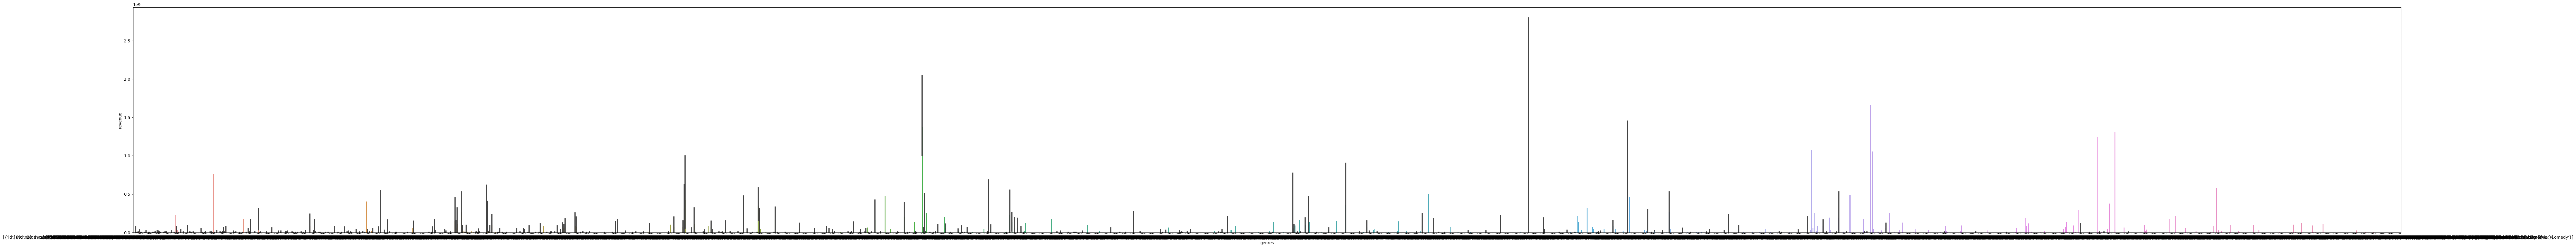

In [30]:
plt.figure(figsize=(100,10))
sns.barplot(data=df, x='genres',y='revenue');

In [31]:
## Function to get just the genre names as a list 
def get_genre_name(x):
    # changing ' to " for the json
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [32]:
## Use function and explode the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list
1,tt0119830,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,307046.0,en,One Dog Day,...,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,One Dog Day,0.0,0.0,0.0,NaN,Action
1,tt0119830,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,307046.0,en,One Dog Day,...,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,One Dog Day,0.0,0.0,0.0,NaN,Drama
1,tt0119830,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,307046.0,en,One Dog Day,...,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,One Dog Day,0.0,0.0,0.0,NaN,Comedy
2,tt0120589,0.0,/1ZilEjqou6JC369GOKwHWeqCbYL.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,649985.0,pt,Predestinado: Arigó e o Espírito do Dr. Fritz,...,0.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,NaN,Predestinado: Arigó e o Espírito do Dr. Fritz,0.0,7.5,10.0,NaN,Drama
3,tt0200940,0.0,/qSHvhAEnomjwDNmYVnQIBbQyqpA.jpg,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,68240.0,en,Over-sexed Rugsuckers from Mars,...,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll never trust your vacuum cleaner again!,Over-sexed Rugsuckers from Mars,0.0,3.3,4.0,NaN,Science Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4669,tt9899880,0.0,/rmy3Um1ZVf0CiVUeS3kXURsQcU2.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,620124.0,fa,کلمبوس,...,82.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,Columbus,0.0,6.0,1.0,NaN,Comedy
4669,tt9899880,0.0,/rmy3Um1ZVf0CiVUeS3kXURsQcU2.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,620124.0,fa,کلمبوس,...,82.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,Columbus,0.0,6.0,1.0,NaN,Drama
4670,tt9904014,0.0,/4PzN8wdSBpX3u9gMie5wFsQky9v.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,563109.0,de,Verloren in Klessin,...,90.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Lost in Klessin,0.0,7.0,2.0,NaN,Drama
4670,tt9904014,0.0,/4PzN8wdSBpX3u9gMie5wFsQky9v.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,563109.0,de,Verloren in Klessin,...,90.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Lost in Klessin,0.0,7.0,2.0,NaN,War


In [33]:
# Drop NAs
df=df_explode.dropna(subset=['genres_list'])

In [34]:
df.drop('genres', axis=1, inplace=True)
df.head()

C:\Users\paulm\AppData\Local\Temp\ipykernel_2488\2523666578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('genres', axis=1, inplace=True)


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,homepage,id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list
1,tt0119830,0.0,NaN,NaN,0.0,NaN,307046.0,en,One Dog Day,This film spans one hot day in New York and fo...,...,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,One Dog Day,0.0,0.0,0.0,NaN,Action
1,tt0119830,0.0,NaN,NaN,0.0,NaN,307046.0,en,One Dog Day,This film spans one hot day in New York and fo...,...,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,One Dog Day,0.0,0.0,0.0,NaN,Drama
1,tt0119830,0.0,NaN,NaN,0.0,NaN,307046.0,en,One Dog Day,This film spans one hot day in New York and fo...,...,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,One Dog Day,0.0,0.0,0.0,NaN,Comedy
2,tt0120589,0.0,/1ZilEjqou6JC369GOKwHWeqCbYL.jpg,NaN,0.0,NaN,649985.0,pt,Predestinado: Arigó e o Espírito do Dr. Fritz,NaN,...,0.0,"[{'english_name': 'Portuguese', 'iso_639_1': '...",Released,NaN,Predestinado: Arigó e o Espírito do Dr. Fritz,0.0,7.5,10.0,NaN,Drama
3,tt0200940,0.0,/qSHvhAEnomjwDNmYVnQIBbQyqpA.jpg,NaN,0.0,NaN,68240.0,en,Over-sexed Rugsuckers from Mars,Aliens return to earth after 10 million years ...,...,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You'll never trust your vacuum cleaner again!,Over-sexed Rugsuckers from Mars,0.0,3.3,4.0,NaN,Science Fiction


In [36]:
# Create groups dictionary. 
groups = {}
# Loop through all unique categories
for i in df['genres_list'].unique():
    # Get series for group and rename
    data = df.loc[df['genres_list']==i,'budget'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['Action', 'Drama', 'Comedy', 'Science Fiction', 'Horror', 'Mystery', 'Thriller', 'Romance', 'War', 'Animation', 'Adventure', 'History', 'Crime', 'Music', 'Family', 'Fantasy', 'Documentary', 'Western', 'TV Movie'])

In [37]:
# Running normality test confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    # save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
# convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
Action,2344.0,0.000000e+00,2921.268694
Drama,9983.0,0.000000e+00,25546.564824
Comedy,5335.0,0.000000e+00,8356.916108
Science Fiction,1185.0,1.125343e-287,1321.447668
Horror,3434.0,0.000000e+00,6617.907230
Mystery,1164.0,0.000000e+00,1836.122873
Thriller,4055.0,0.000000e+00,9146.652493
Romance,2467.0,0.000000e+00,5112.502827
War,334.0,3.119971e-140,642.448179
Animation,794.0,2.487244e-184,845.528964


In [38]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
Action,2344.0,0.000000e+00,2921.268694,True
Drama,9983.0,0.000000e+00,25546.564824,True
Comedy,5335.0,0.000000e+00,8356.916108,True
Science Fiction,1185.0,1.125343e-287,1321.447668,True
Horror,3434.0,0.000000e+00,6617.907230,True
Mystery,1164.0,0.000000e+00,1836.122873,True
Thriller,4055.0,0.000000e+00,9146.652493,True
Romance,2467.0,0.000000e+00,5112.502827,True
War,334.0,3.119971e-140,642.448179,True
Animation,794.0,2.487244e-184,845.528964,True


In [39]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=71.10749113243224, pvalue=2.489014299998715e-256)

In [40]:
## save the values as kg_lost and the labels to the Diet
values = df['budget']
labels = df['genres_list']

In [41]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


C:\Users\paulm\anaconda3\envs\dojo-env\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


group1,group2,meandiff,p-adj,lower,upper,reject
Action,Adventure,8108171.9097,0.0,5660788.8096,10555555.0097,True
Action,Animation,-1541654.8975,0.8941,-4273307.379,1189997.584,False
Action,Comedy,-6462716.9986,0.0,-8111237.496,-4814196.5012,True
Action,Crime,-6048105.3646,0.0,-8165233.9096,-3930976.8196,True
Action,Documentary,-8436984.0869,0.0,-13543048.694,-3330919.4797,True
Action,Drama,-7402624.1061,0.0,-8929512.8446,-5875735.3677,True
Action,Family,-1737262.7037,0.502,-4113851.3096,639325.9022,False
Action,Fantasy,-440237.1376,1.0,-2853838.9225,1973364.6473,False
Action,History,-4061616.8863,0.0003,-7062158.198,-1061075.5746,True
Action,Horror,-7829688.4059,0.0,-9612058.3615,-6047318.4504,True


### Final Conclusion
We reject the null hypothesis in support of the alternate hypothesis because genres do seem to affect the budget